https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/

The goal is to partition n data points into k clusters. Each of the n data points will be assigned to a cluster with the nearest mean. The mean of each cluster is called its “centroid” or “center”.

In [4]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np

In [5]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
 
    # return the histogram
    return hist

In [11]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
 
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [28]:
def run_k_means(image_path, clusters):
    # load the image and convert it from BGR to RGB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    
    # reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    # cluster the pixel intensities
    clt = KMeans(n_clusters=clusters)
    clt.fit(image)
    
    print(clt.cluster_centers_)
    
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)

    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

[[  5.87554992   3.36819785   3.45491657]
 [252.98406598 252.70190446 252.87554864]
 [205.44508831   5.13616325   6.22840824]
 [156.32989414 175.66648801  34.58783331]]


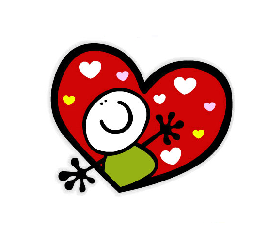

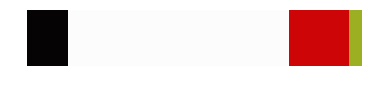

In [45]:
run_k_means('k-means-color-clustering-images/dp.png', 4)

[[  1.2405856    0.65193471   0.51775822]
 [244.88630962 241.41170618 147.21582933]
 [238.51885251   8.21321794   5.03903649]]


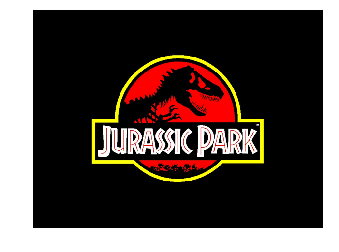

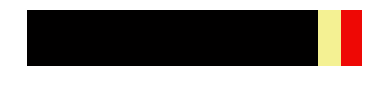

In [29]:
run_k_means('k-means-color-clustering-images/jp.png', 3)

[[  2.63722424  10.64984638   6.89168766]
 [ 92.62086129 160.32342317 112.01528141]
 [ 35.78005847  90.09358363  56.3450377 ]
 [165.81017958 216.06445837 167.06393175]]


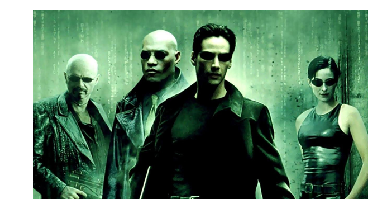

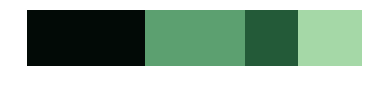

In [30]:
run_k_means('k-means-color-clustering-images/thematrix.png', 4)

[[230.8150319  233.24278081 238.94485147]
 [  6.07928631   7.4694731    9.99858749]
 [ 25.61126376  82.27181136 117.60791192]
 [115.53101737 128.0819659  134.9976787 ]
 [191.75691013 200.83818759 217.83809919]]


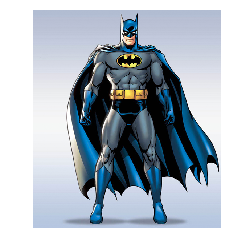

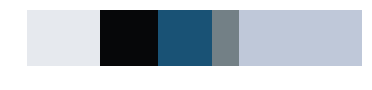

In [31]:
run_k_means('k-means-color-clustering-images/batman.png', 5)